In [2]:
#load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
import re

In [3]:
def dataLoad(filename):
    #load dataset
    X=[]
    count = 0

    text_file = open(filename, "r")
    lines = text_file.readlines()
    
    for line in lines:
        X.append([])
        words = re.split('[ \n]+',line.strip())
        #print words  
        for word in words:
            X[count].append(float(word))
        count += 1
    return np.asarray(X)

In [8]:

def data_visulization(X):
    '''
    Task 1: data preprocessing before building up modeling for raw dataset X
    '''
    #load data and plot the price histogram distribution
    print('\n', '*'*20, '*'*20, '\n')
    print('Dataset shape: ', X.shape, '\n')
    cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    data = pd.DataFrame(X, columns=cols)
    print('Dataset output price visualization ...  \n')
    # print(data.head())
    plt.figure(figsize=(12,8))
    plt.grid()
    sns.histplot(data.iloc[:,-1], kde=True)
    plt.xlabel("MEDV")
    plt.ylabel("Price")
    plt.title("Price Distribution")
#     plt.savefig(f'output/task1_price_distribution.png')
#     print('Price distribution figure saved in output folder as: task1_price_distribution.png', '\n')
    plt.show()

    #Boxplot of dataset
    plt.figure(figsize = (12,8))
    data.boxplot()
    plt.xlabel('')
    plt.ylabel('value')
    plt.title('Boxplot of housing features')
#     plt.savefig(f'output/task1_housing_feature.png')
#     print('Housing feature figure saved in output folder as: task1_housing_feature.png', '\n')
    plt.show()
    
    #pairplot of dataset to show correlation
    print('Dataset correlation analysis ...  \n')
    plt.figure(figsize=(12,12))
    sns.pairplot(data, kind="reg")
#     plt.savefig(f'output/task1_dataset_pairplot.png')
#     print('Dataset pairplot saved in output folder as: task1_dataset_pairplot.png', '\n')
    plt.show()

    #generate correlation maxtrix and stored in data folder
    correlation  = data.corr()
    print('Dataset correlation matrix: ', correlation, '\n')
#     correlation.to_csv(f'output/task1_correlation_matrix.data')
#     print('Dataset correlation matrix saved in output folder: task1_correlation_matrix.data', '\n')


 ******************** ******************** 

Dataset shape:  (506, 14) 

Dataset output price visualization ...  



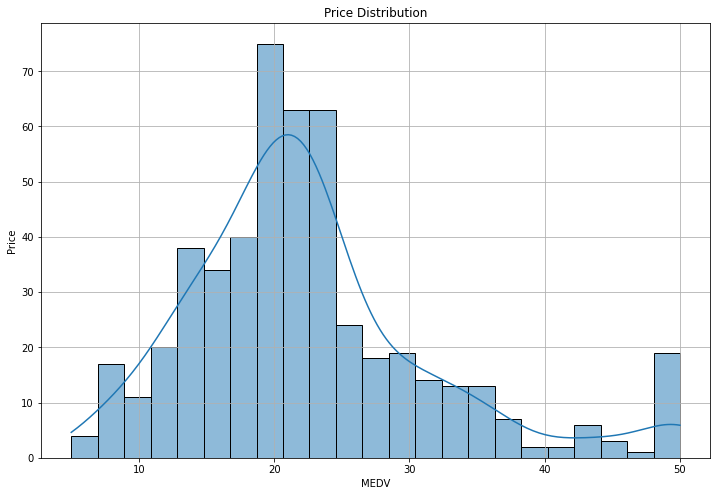

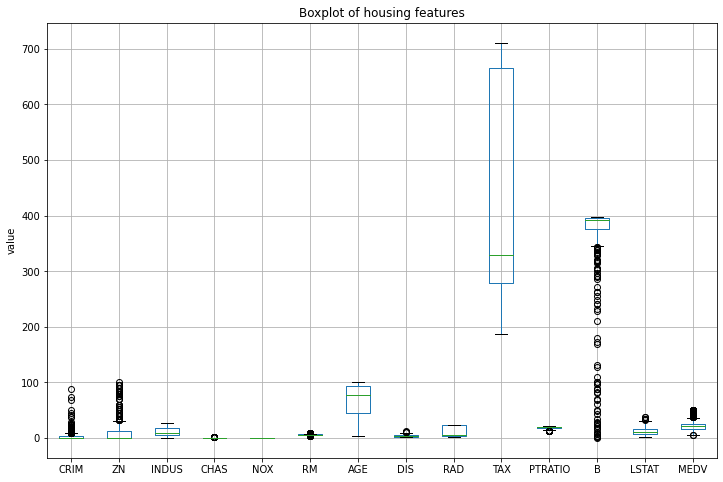

Dataset correlation analysis ...  



<Figure size 864x864 with 0 Axes>

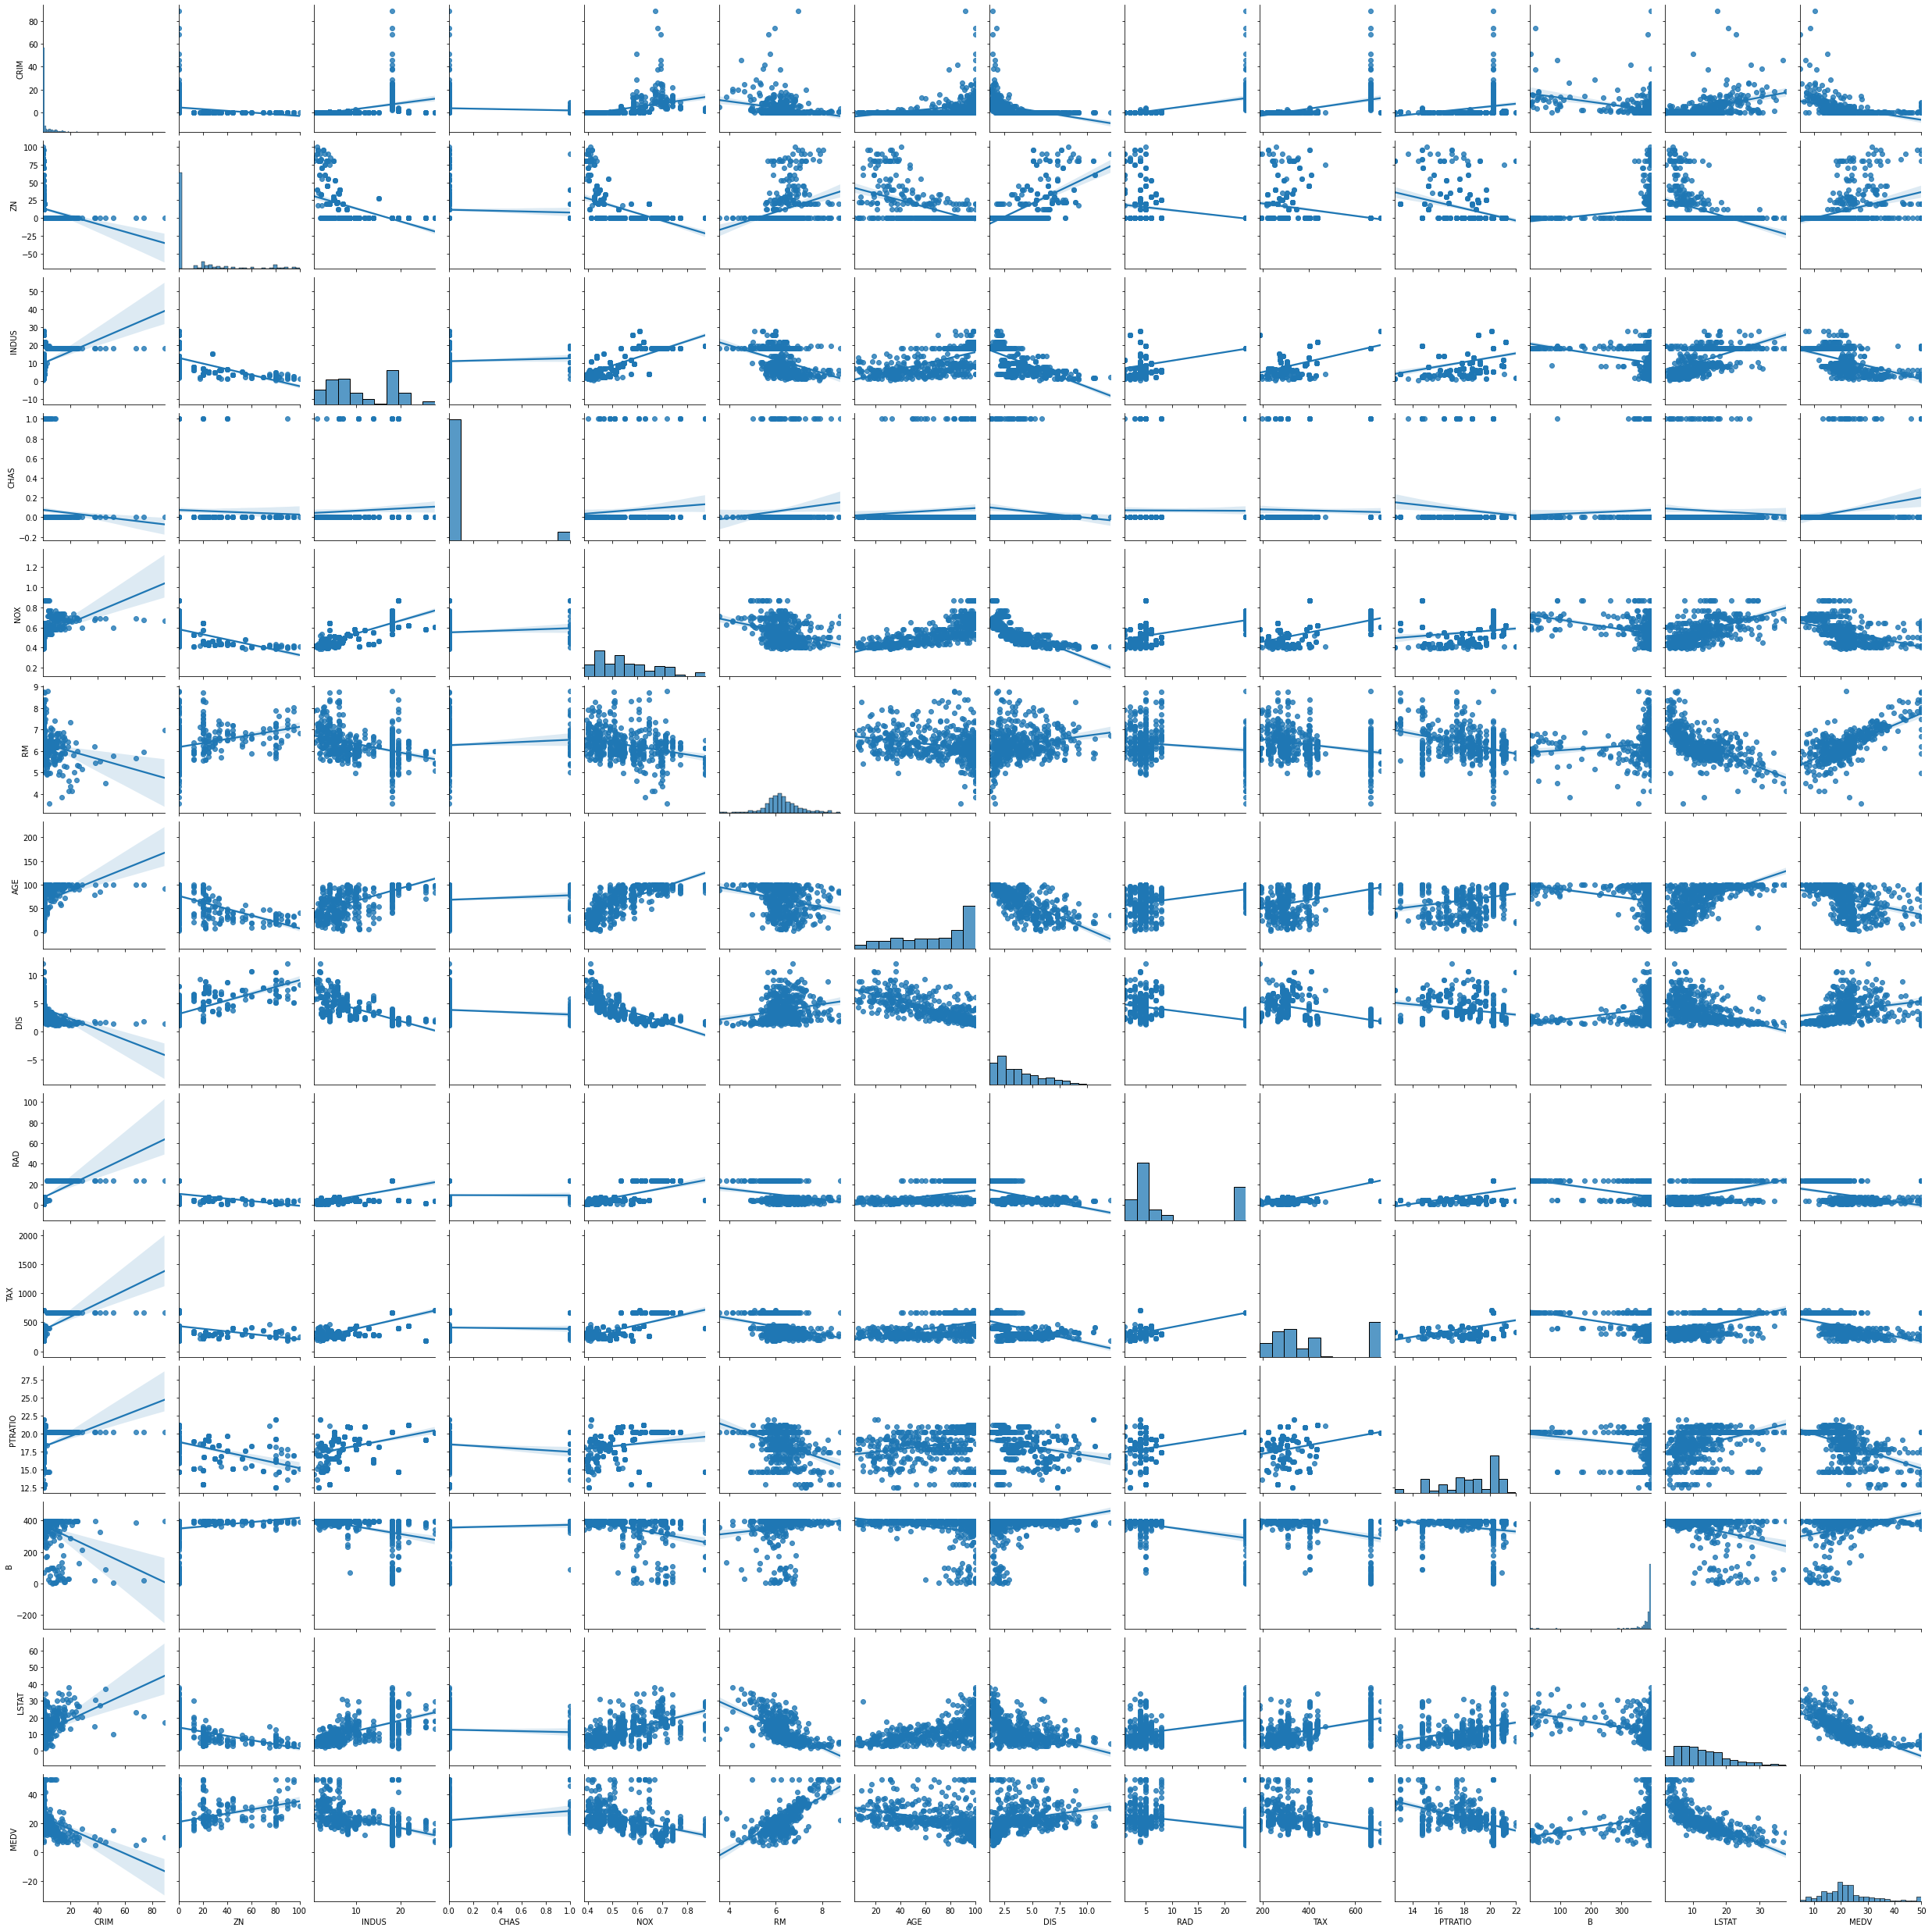

Dataset correlation matrix:               CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   

In [9]:
X = dataLoad('housing.data')
data_visulization(X)

In [10]:
#convert into dataframe

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.data', names = cols, header=None, delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
correlation  = df.corr()
correlation


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [15]:
#get highest correlation features
df.corr()
dfs = abs(df.corr())
dfs = dfs.sort_values(by=['MEDV'], ascending=False)
dfs
# datas.index.values[:6]



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.388305,0.360445,0.483725,0.175260,0.427321,0.695360,0.376955,0.249929,0.381626,0.468536,0.507787,0.333461,0.737663,1.000000
LSTAT,0.455621,0.412995,0.603800,0.053929,0.590879,0.613808,0.602339,0.496996,0.488676,0.543993,0.374044,0.366087,1.000000,0.737663
RM,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
PTRATIO,0.289946,0.391679,0.383248,0.121515,0.188933,0.355501,0.261515,0.232471,0.464741,0.460853,1.000000,0.177383,0.374044,0.507787
INDUS,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
TAX,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536
NOX,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
CRIM,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
RAD,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
AGE,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955


In [16]:
#extract top 5 highest correlation features
idx = dfs.index.values[:6]
data = df[idx]
colums = (data.columns)
colums

Index(['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX'], dtype='object')


 ******************** ******************** 

Choose attribute with highest correlation coefficient with output price.

Most correlated columns chosen for input/output relationship visualization: 
 Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX'], dtype='object') 

Input/output relationship visualizatio...



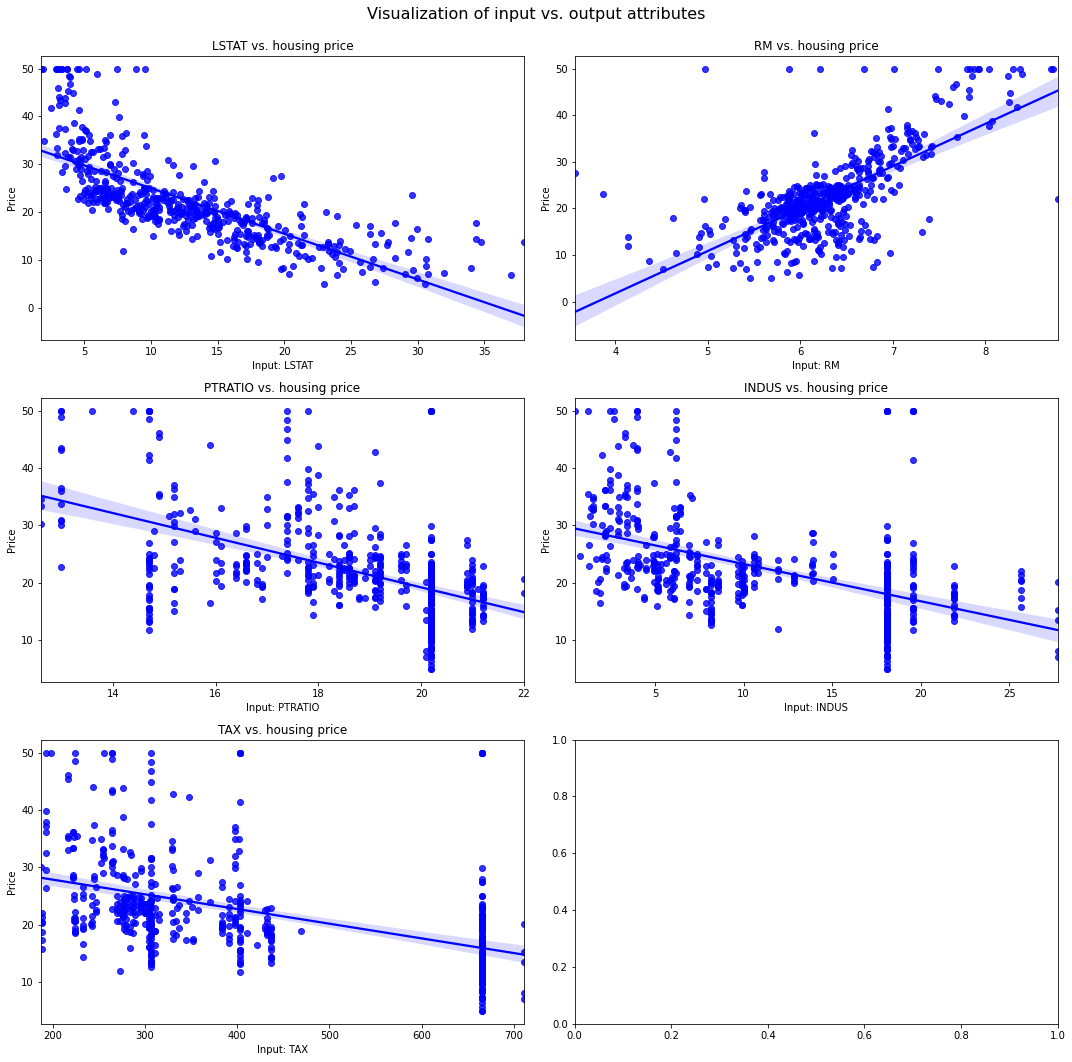

In [26]:
def feature_inspec(filename = 'housing.data'):
    '''visulize input vs. output relationship'''
    print('\n', '*'*20,'*'*20, '\n')
    cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    print('Choose attribute with highest correlation coefficient with output price.\n')
    df = pd.read_csv(filename, names = cols, header=None, delim_whitespace=True)
    dfs = abs(df.corr()).sort_values(by=['MEDV'], ascending=False)
#     print('Correlation matrix:\n', dfs.head(), '\n')
    idx = dfs.index.values[:6]
    data = df[idx]
    colums = data.columns
    print('Most correlated columns chosen for input/output relationship visualization: \n', colums[1:], '\n')
    print('Input/output relationship visualizatio...\n')
    fig, axes = plt.subplots(figsize=(15,15),nrows=3, ncols=2)
    for i in range(len(colums)-1):
        plt.subplot(3, 2, i+1)
    #     plt.scatter(data[colums[i+1]], data[colums[0]], marker='o')
        sns.regplot(x=data[colums[i+1]], y=data[colums[0]], color ='blue')
        plt.xlabel(f"Input: {colums[i+1]}")
        plt.ylabel("Price")
        plt.title(f"{colums[i+1]} vs. housing price")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.suptitle('Visualization of input vs. output attributes', fontsize=16)
#     plt.savefig(f'output/task3_attributes_MEDV.png')
#     print('Regression plot of 5 input attributes vs. MEDV saved in output folder as: task3_attributes_MEDV.png', '\n')
    plt.show()
    return
feature_inspec('housing.data')

In [19]:
df_reg = df[colums]
df_reg.head()

,MEDV,LSTAT,RM,PTRATIO,INDUS,TAX
0,24.0,4.98,6.575,15.3,2.31,296.0
1,21.6,9.14,6.421,17.8,7.07,242.0
2,34.7,4.03,7.185,17.8,7.07,242.0
3,33.4,2.94,6.998,18.7,2.18,222.0
4,36.2,5.33,7.147,18.7,2.18,222.0


In [22]:
X = df_reg.iloc[:,1:]
y = df_reg.iloc[:,0]

In [24]:
#perform linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize=True).fit(X, y)
print('regression score:', reg.score(X, y))
print()
print('regression coef.:', reg.coef_)

regression score: 0.6804097741290724

regression coef.: [-5.59004744e-01  4.62516926e+00 -8.76154330e-01  5.69752124e-02
 -3.53693090e-03]
